In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier  # Scikit-learn API
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns

from project_ml_course.data_process import filter_columns_by_correlation_threshold

sns.set_theme()

In [30]:
raw_df = pd.read_csv("../data/dados.csv", index_col="Unnamed: 0")

df = filter_columns_by_correlation_threshold(
    df=raw_df,
    ref_col="class",
    method_type="pearson",
    lower_threshold=0.001,
    higher_threshold=0.999,
)

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

base_pipeline = Pipeline(
    [
        ("clf", LGBMClassifier(verbose=-1, random_state=42)),
    ]
)

model = TunedThresholdClassifierCV(
    estimator=base_pipeline,
    thresholds=np.arange(0, 1.0, 0.01),
    cv=5,
    scoring="f1",
    random_state=42,
    store_cv_results=True,
)

_ = model.fit(X_train, y_train)

print(model.best_threshold_)

0.36


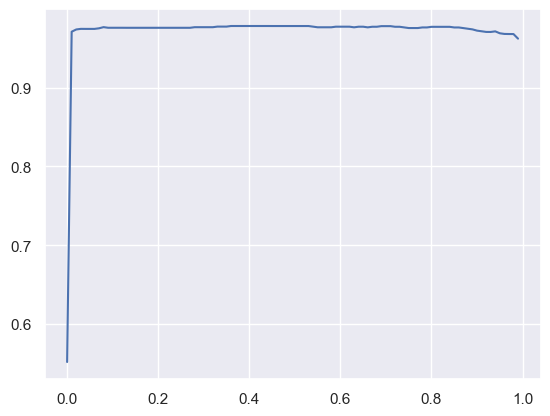

In [35]:
x_plot = model.cv_results_["thresholds"]
y_plot = model.cv_results_["scores"]

plt.plot(x_plot, y_plot)

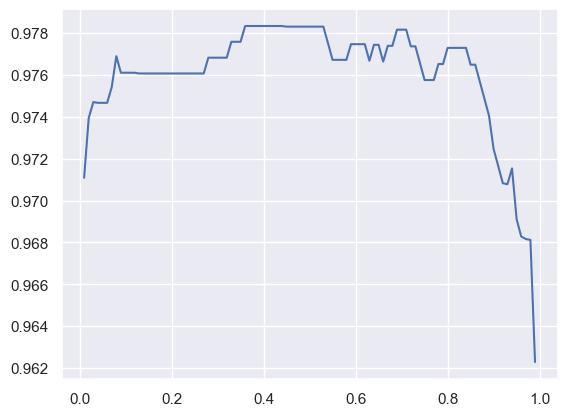

In [36]:
x_plot = model.cv_results_["thresholds"][1:]
y_plot = model.cv_results_["scores"][1:]

plt.plot(x_plot, y_plot)

In [39]:
f1_score(y_test, model.predict(X_test))

0.9512195121951219